## Random numbers of experimental probablity

Pascale Ricketts has invented a game called "3 Rolls to Ten". You roll a fair 6-sided die three times. If the sum of the rolls is 10 or greater you win. If it is less than 10, you lose.

**What is the probablity of winning "3 Rolls to Ten"?**

Lets generate a string containing random numbers from [0-9] which we can make use to simulate our experiment.

In [1]:
# Datastructrue to hold the experimental data
exp = []
import random
import numpy as np
import pandas as pd

In [2]:
for i in range(0, 1000):
    ran = random.randint(0,9)
    exp.append(ran)

Lets frame the below logic to interpret our expriment:

- We look at each element in the `exp` array and if the element is 0,7,8 or 9 we simply ignore it because they don't appear on a die in reality
- We select the valid continuous three numbers from `exp` array and sum them
- If the sum is 10 or greater we mark that as a win `1` other wise we mark it as loss `0`

In [3]:
exp_num = [];
result = [];
exp_probality = []

In [4]:
def getEligibleNum(exp, i):
    if(i >= len(exp)):
        print("reached end of array")
        return (i, -1)
    num = exp[i]
    if((exp[i] == 0) or exp[i] >=7):
        return getEligibleNum(exp, i + 1)
    return (i, num)

In [5]:
i = 0

while(i < len(exp)):
    (i, a) = getEligibleNum(exp, i)
    (i, b) = getEligibleNum(exp, i + 1)
    (i, c) = getEligibleNum(exp, i + 1)
    if((a + b + c) >= 10):
        result.append(1)
    else:
        result.append(0)

reached end of array
reached end of array


In [6]:
print(len(result))
print(len(exp))

313
1000


In [7]:
r = np.array(result)

In [8]:
prob = r[r == 1].shape[0]/ r.shape[0]
print(prob)

0.5782747603833865


In [9]:
for (idx, val) in enumerate(r):
    subset = r[:idx + 1]
    wins = subset[subset == 1].shape[0]
    p = wins / (idx + 1)
    exp_probality.append(p)

In [10]:
# The above graph using plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go


In [11]:
df = pd.DataFrame(np.array(exp_probality))

In [12]:
df.head()

,0
0,1.000000
1,0.500000
2,0.333333
3,0.250000
4,0.200000


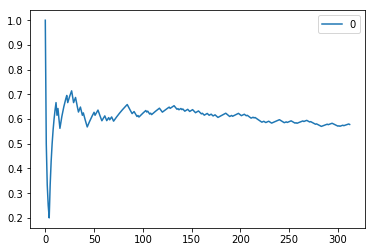

In [17]:
df.plot()
from matplotlib import pyplot as plt
plt.show()

In [13]:
data = [go.Bar(x=df.index, y = df[0])]
py.iplot(data, filename='prob/experiment')

**The above graph shows that the probability of winning "3 Rolls to Ten" is around 0.6**